This dataset is from a competition hosted by IEEE-CIS. The dataset itself contains data for a bianry classification problems. In this kernel, i am going to do a analysis following this pipeline:

* **Understand the problem.** I will try to find out what variable is important to the target variables and also detect some problems that might exist.
* **Univariable study.** I will focus on a target variables 'isFraud' to know more about it.
* **Multivariate study.** I will try to understand the relationship between the dependent variable and the independent variable.
* **Data processing.** I will clean the dataset, handle missing values, outliers and categorical values.
* **Feature Engineering, Data Modelling and Model Training** I will tried to aggregrate some more feature that might be useful, prepare data for modelling and train my model.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


# Understanding data
Let's first try to load and understand what we are dealing with first:

In [2]:
trans_df = pd.read_csv("/kaggle/input/ieee-fraud-detection/train_transaction.csv")
id_df = pd.read_csv("/kaggle/input/ieee-fraud-detection/train_identity.csv")

In [3]:
trans_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
id_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


Looking at the 2 datasets, it can be seen that the dataset itself is split into 2 table, one for the transaction details and the other one for the identity of the one doing the transaction.

In [5]:
print(id_df.columns)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


As can be seen from the tables, there are a few things we can conclude:
* 'TransactionID': this variable is nominal and used to uniquely identify a transaction and not likely to have any impact on our target variable 'isFraud'
* 'DeviceType', 'DeviceInfo': these are also nominal used to identify the types of device and information available for that device.
* 'id_01'-'id_038': these are miscellanious variables with no distinct name containing various types of variable and there is no note for the dataset so it is nie impossible to figure out what it might represent.

In [6]:
print(trans_df.columns)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)


* 'isFraud': this attributes is our target variables which we will be analysing in univariate analysis and in combination with other variable in multivariate analysis.
* 'TransactionAmt' : this attributes refers to the amount of money made in the transaction and it might have an impact on our isFraud variable.
* 'card4' : this attributes represents the type of cards transaction is being used and might also impact isFraud.
* All other attributes are arbitrary number that can not be given a sound description.

**P.s: Some of those arbitraries might be more well-undrestood after we finished our univariate and multivariate analysis.**

In [7]:
df = pd.merge(trans_df, id_df, on='TransactionID', how='left')

In [8]:
del trans_df, id_df

In [9]:
print(f'There are {df.isnull().any().sum()} columns out of {len(df.columns)} in transaction dataset with missing values.')

There are 414 columns out of 434 in transaction dataset with missing values.


In both dataset, a large amount of attributes all have missing values which is normal in the real world. Let's now move to exploring our data through univariate and multivariable analysis.

# Univariate and Multivariable Analysis
We will start with the identity dataframe. After inspection, i found out that id_01 - id_11 are continuous variables, id_12 - id_38 are categorical and the last two columns are obviously also categorical.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='id_11', ylabel='Count'>

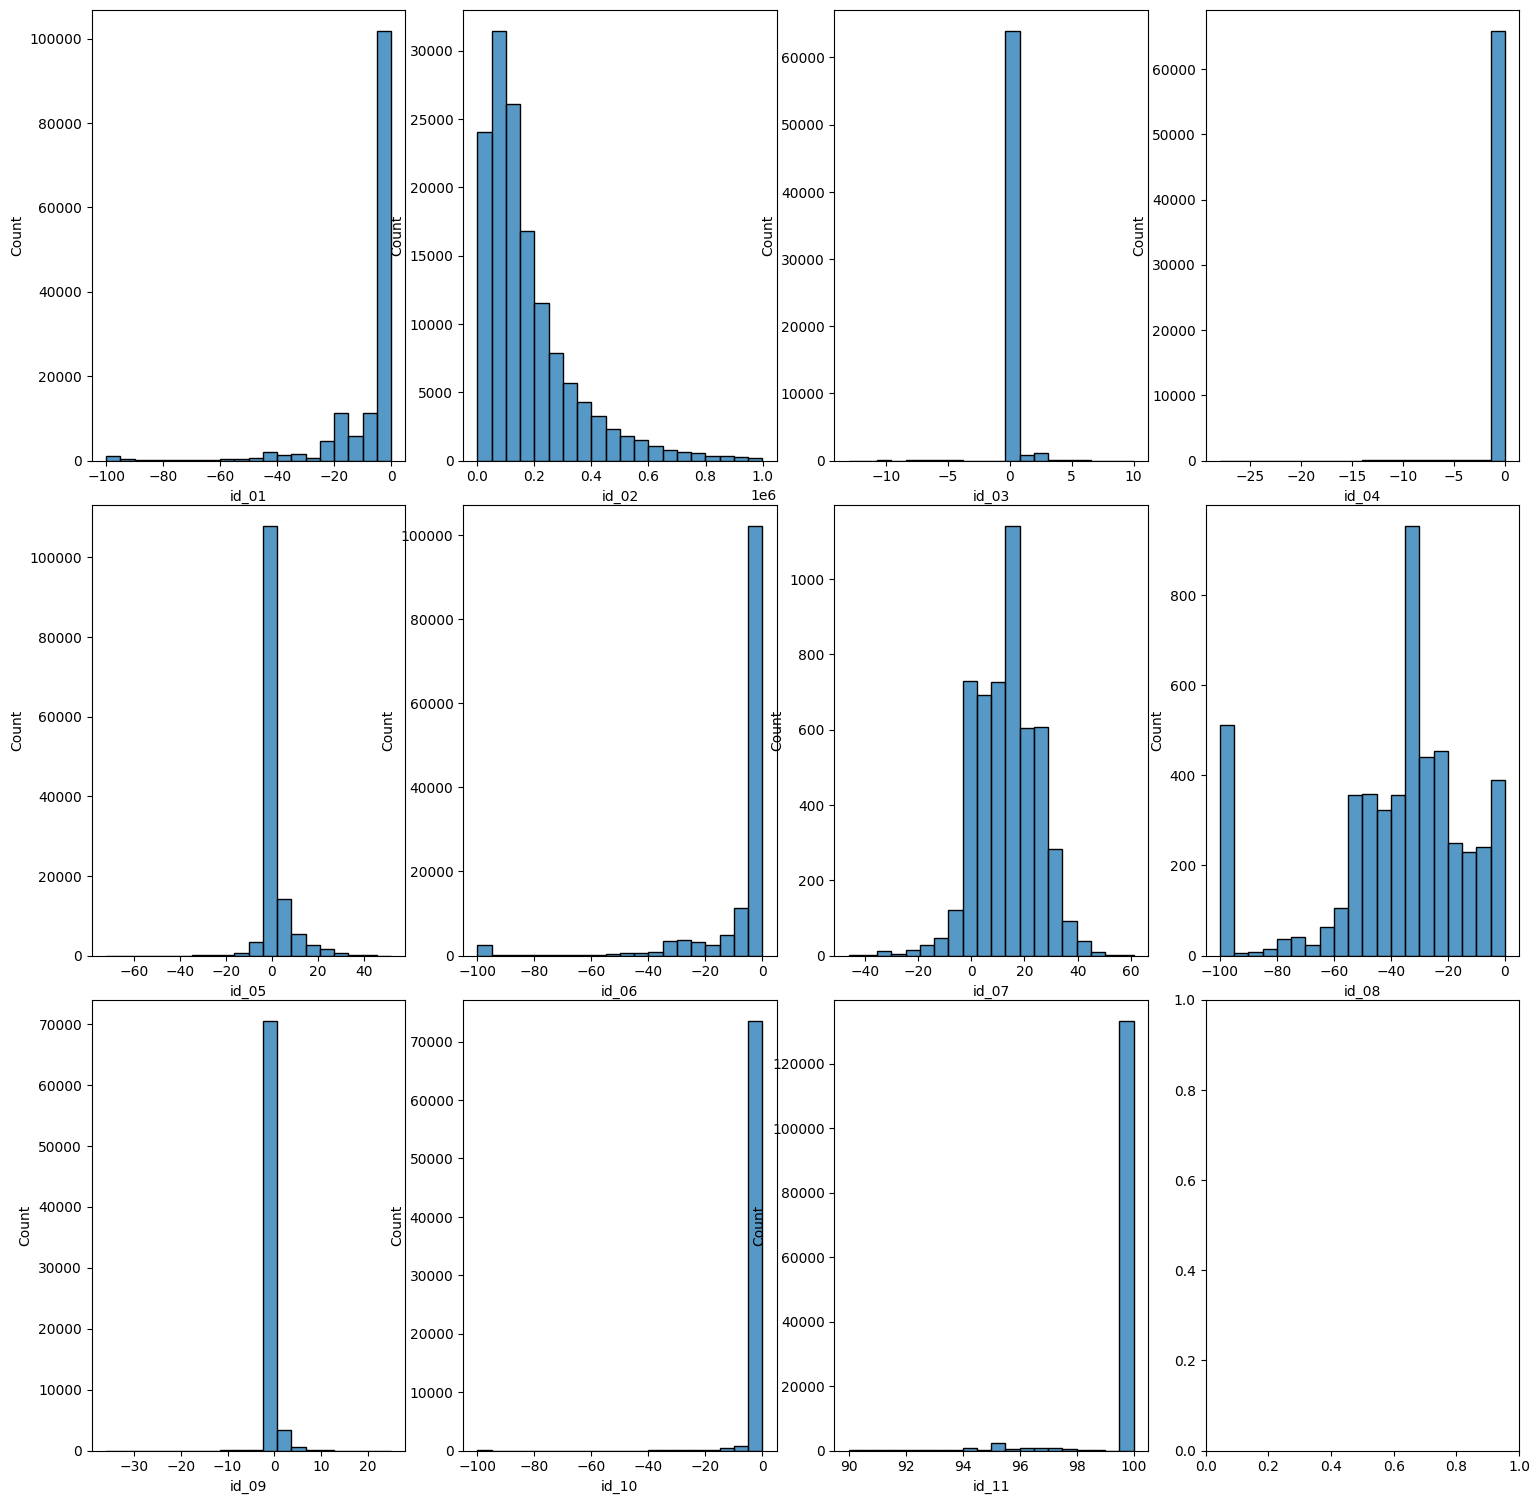

In [10]:
f, axes = plt.subplots(3, 4, figsize=(15,15))
f.tight_layout()
sns.histplot(df['id_01'],ax=axes[0,0],bins=20)
sns.histplot(df['id_02'],ax=axes[0,1],bins=20)
sns.histplot(df['id_03'],ax=axes[0,2],bins=20)
sns.histplot(df['id_04'],ax=axes[0,3],bins=20)
sns.histplot(df['id_05'],ax=axes[1,0],bins=20)
sns.histplot(df['id_06'],ax=axes[1,1],bins=20)
sns.histplot(df['id_07'],ax=axes[1,2],bins=20)
sns.histplot(df['id_08'],ax=axes[1,3],bins=20)
sns.histplot(df['id_09'],ax=axes[2,0],bins=20)
sns.histplot(df['id_10'],ax=axes[2,1],bins=20)
sns.histplot(df['id_11'],ax=axes[2,2],bins=20)

As can be seen, most of the attributes id are skewed and most all have a lot of missing data with the exception of id_05, id_09, id_07 and id_03. Out of all the attributes we have to be wary of id_07 as it already seems to be normalized. Let's dive deeper into the values in these columns.

In [11]:
df['id_01'].value_counts(dropna=False, normalize=True).head()

id_01
 NaN     0.755761
-5.0     0.139144
 0.0     0.033114
-10.0    0.019062
-20.0    0.018984
Name: proportion, dtype: float64

In id_01, 75% are null values but strangely there are almost 14% are -5.

In [12]:
df['id_02'].value_counts(dropna=False, normalize=True).head()

id_02
NaN       0.761452
1102.0    0.000019
696.0     0.000017
1116.0    0.000015
1120.0    0.000015
Name: proportion, dtype: float64

id_02
NaN       0.761452
1102.0    0.000019
696.0     0.000017
1116.0    0.000015
1120.0    0.000015
Name: proportion, dtype: float64

For id_02, we have 76% null values and nothing that stands out.

In [13]:
df['id_03'].value_counts(dropna=False, normalize=True).head()

id_03
NaN    0.887689
0.0    0.108211
1.0    0.001461
3.0    0.001131
2.0    0.000713
Name: proportion, dtype: float64

In id_03, 88% are null values but strangely there are almost 10% are 0.

In [14]:
df['id_04'].value_counts(dropna=False, normalize=True).head()

id_04
 NaN    0.887689
 0.0    0.111320
-5.0    0.000224
-6.0    0.000166
-8.0    0.000108
Name: proportion, dtype: float64

In id_04, 88% are null values but strangely there are almost 11% are 0.

In [15]:
df['id_05'].value_counts(dropna=False, normalize=True).head()

id_05
NaN    0.768238
0.0    0.157048
1.0    0.014043
2.0    0.008360
3.0    0.006526
Name: proportion, dtype: float64

In id_05, 77% are null values but strangely there are almost 15% are 0.

In [16]:
df['id_06'].value_counts(dropna=False, normalize=True).head()

id_06
 NaN    0.768238
 0.0    0.154647
-1.0    0.007937
-5.0    0.006518
-6.0    0.005515
Name: proportion, dtype: float64

In id_06, 77% are null values but strangely there are almost 15% are 0.

In [17]:
df['id_07'].value_counts(dropna=False, normalize=True).head()

id_07
NaN     0.991271
0.0     0.000693
16.0    0.000415
14.0    0.000386
12.0    0.000352
Name: proportion, dtype: float64

For id_07, even though it looks like normalize but it is almost an empty set with 99% of the columns missing.

In [ ]:
df['id_08'].value_counts(dropna=False, normalize=True).head()

The same can be said about id_08.

In [ ]:
df['id_09'].value_counts(dropna=False, normalize=True).head()

In id_09, there are 87% of values missing and 12% of the values are 0.

In [ ]:
df['id_10'].value_counts(dropna=False, normalize=True).head()

In id_10, there are 87% null values and 12%  values are 0.

In [ ]:
df['id_11'].value_counts(dropna=False, normalize=True).head()

In id_11, 76% of the values is missing and what is most bizare is that almost all of the non missing values are 100

In [ ]:
print(df.columns.tolist())

In [ ]:
print(df['id_16'].unique().tolist())